In [18]:
#导入必要库
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [56]:
#加载并预处理数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0 #归一化
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#构建简单神经网络模型
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [57]:
#编译模型
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
#训练模型
history = model.fit(
    x_train, y_train,
    epochs=0,
    batch_size=32,
    validation_split=0.1
)

In [59]:
#评估模型性能
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n测试集准确率：{test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.1066 - loss: 2.3726 

测试集准确率：0.1066


In [60]:
#预测单个样本
sample_index = 42
predictions = model.predict(x_test[sample_index:sample_index+1])
predicted_digit = tf.argmax(predictions[0]).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


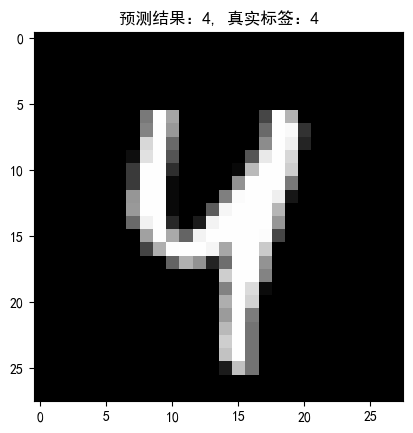

In [61]:
#可视化预测结果
plt.rcParams["font.family"] = ["SimHei"]  # 优先使用黑体
plt.rcParams['axes.unicode_minus'] = False
plt.imshow(x_test[sample_index].reshape(28,28), cmap='gray')
plt.title(f'预测结果：{predicted_digit}, 真实标签：{y_test[sample_index]}')
plt.show()

In [55]:
# 查看数据类型和部分值
print("x_train类型:", type(x_train))       # <class 'numpy.ndarray'>
print("单张图像形状:", x_train[0].shape)   # (28, 28)
print("图像像素值范围:", x_train.min(), "~", x_train.max())  # 0.0 ~ 1.0
print("标签示例:", y_train[:5])            # [5 0 4 1 9]

x_train类型: <class 'numpy.ndarray'>
单张图像形状: (28, 28, 1)
图像像素值范围: 0.0 ~ 1.0
标签示例: [5 0 4 1 9]
